<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


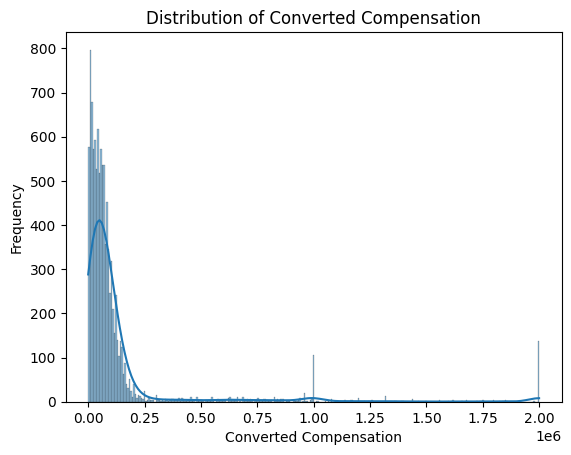

In [5]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(df['ConvertedComp'],kde=True)
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')
plt.show()

Plot the histogram for the column `ConvertedComp`.


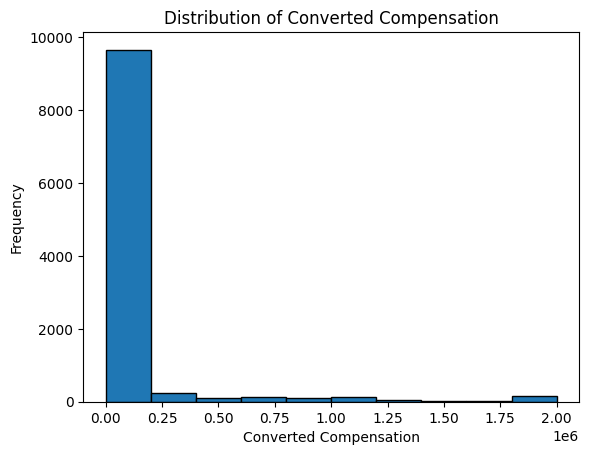

In [12]:
# your code goes here
plt.hist(df['ConvertedComp'], edgecolor='black')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Converted Compensation')
plt.show()

What is the median of the column `ConvertedComp`?


In [14]:
# your code goes here
median_Val=df['ConvertedComp'].median()
median_Val

57745.0

How many responders identified themselves only as a **Man**?


In [20]:
# your code goes here
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [25]:
# your code goes here
women_count=df[df['Gender']=='Woman']
women_count['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [54]:
# your code goes here
df['Age'].describe()


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


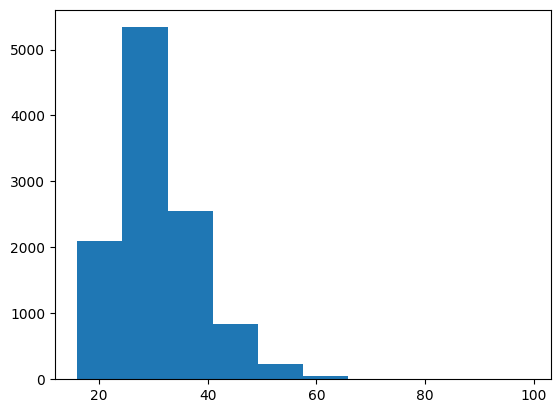

In [30]:
# your code goes here
plt.hist(df['Age'])
plt.show()

## Outliers


### Finding outliers


In [56]:
median_converted_comp = df['ConvertedComp'].median()
median_converted_comp

57745.0

Find out if outliers exist in the column `ConvertedComp` using a box plot?


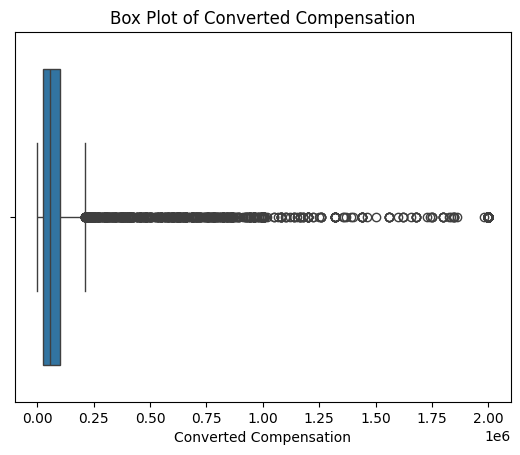

In [31]:
# your code goes here
sns.boxplot(x=df['ConvertedComp'])
plt.xlabel('Converted Compensation')
plt.title('Box Plot of Converted Compensation')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [40]:
# your code goes here
import numpy as np

Q1=df['ConvertedComp'].quantile(.25)
Q3=df['ConvertedComp'].quantile(.75)
IQR=Q3 - Q1
print('The Inter Quartile Range for ConvertedComp:', IQR)

The Inter Quartile Range for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [41]:
# your code goes here
upper=Q3+(IQR*1.5)
lower=Q1-(IQR*1.5)

print('Upper Bound:', upper)
print('Lower Bound:', lower)

Upper Bound: 209698.0
Lower Bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [42]:
# your code goes here
(df['ConvertedComp']<lower) | (df['ConvertedComp']>upper)

0        False
1        False
2        False
3         True
4        False
         ...  
11393    False
11394    False
11395    False
11396    False
11397    False
Name: ConvertedComp, Length: 11398, dtype: bool

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [58]:
# your code goes here
df2 = df['ConvertedComp'].clip(upper, lower)
df2.describe()


count     10582.000000
mean      72327.661406
std       58619.926538
min           0.000000
25%       26868.000000
50%       57745.000000
75%      100000.000000
max      209698.000000
Name: ConvertedComp, dtype: float64

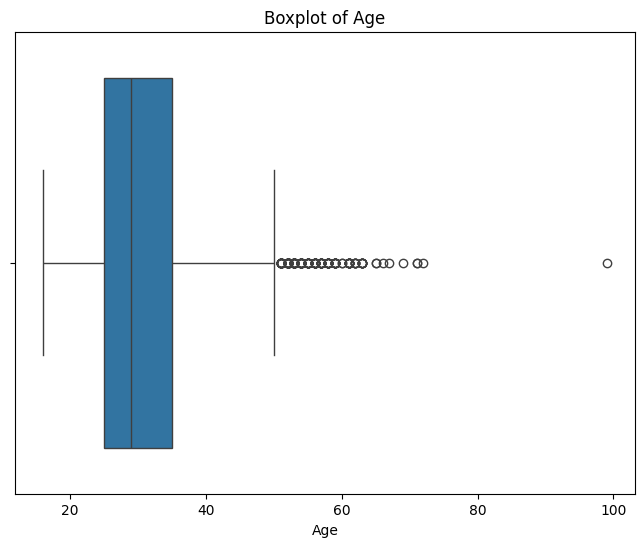

Number of outliers below Q1: 0


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and the column is 'Age'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.show()

# Calculate quartiles and IQR
q1 = df['Age'].quantile(0.25)
iqr = df['Age'].quantile(0.75) - q1

# Define lower bound for outliers
lower_bound = q1 - 1.5 * iqr

# Count outliers below Q1
outliers_below_q1 = (df['Age'] < lower_bound).sum()
print(f"Number of outliers below Q1: {outliers_below_q1}")


In [71]:

# Calculate quartiles and IQR
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1

# Define outlier bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the DataFrame to exclude outliers
filtered_df = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Calculate median after removing outliers
# median_converted_comp_no_outliers = filtered_df['ConvertedComp'].median()

mean_converted_comp_no_outliers = filtered_df['ConvertedComp'].mean()

# print(f"The median ConvertedComp after removing outliers is: {median_converted_comp_no_outliers}")
print(f"The median ConvertedComp after removing outliers is: {median_converted_comp_no_outliers}")

# Calculate mean after removing outliers
mean_converted_comp_no_outliers = filtered_df['ConvertedComp'].mean()

print(f"The mean ConvertedComp after removing outliers is: {mean_converted_comp_no_outliers}")

The median ConvertedComp after removing outliers is: 52704.0
The mean ConvertedComp after removing outliers is: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [52]:
# your code goes here

numeric_df = df.select_dtypes(include=['number'])
age_corr = numeric_df.corr()['Age'].drop('Age')
print("Correlation between Age and other numerical columns:")
print(age_corr)

Correlation between Age and other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
